# Import des bibliothèques nécessaires

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Présentation de la problématique et importation des données

## Présentation de la problématique


Le jeu de données "California Housing" contient des informations sur les logements en Californie, aux États-Unis, ainsi que leur valeur. 
L'objectif de ce jeu de projet **prédire la valeur des logements en fonction de leurs caractéristiques**.



Le fichier de données peut être téléchargé à partir de la page Kaggle suivante : [California Housing](https://www.kaggle.com/harrywang/housing)



Les variables présentes dans le jeu de données sont les suivantes :

- `longitude` : Longitude de la localisation du logement
- `latitude` : Latitude de la localisation du logement
- `housing_median_age` : Âge médian des logements dans la région
- `total_rooms` : Nombre total de chambres dans la région
- `total_bedrooms` : Nombre total de chambres à coucher dans la région
- `population` : Population totale dans la région
- `households` : Nombre total de ménages dans la région
- `median_income` : Revenu médian des ménages dans la région
- `median_house_value` : Valeur médiane des maisons dans la région
- `ocean_proximity` : Proximité de la maison par rapport à l'océan (côte, île, etc.)









## Importation et nettoyage des données

In [1]:
import pandas as pd
data = pd.read_csv('housing.csv',sep=";",decimal=",")

In [2]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52.0,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52.0,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [3]:
#Information sur la base de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(5), int64(4), object(1)
memory usage: 1.6+ MB


In [4]:
#Analyse des données manquantes
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# Description des tables
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# On suppose que les régions qui ont la variable total_bedooms manquantes n'ont pas de chambre
# Remplacement des valeurs manquantes par 0 pour la variable 'total_bedrooms'
data['total_bedrooms'].fillna(0, inplace=True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Description des biens de la base de données

## Description des variables numériques

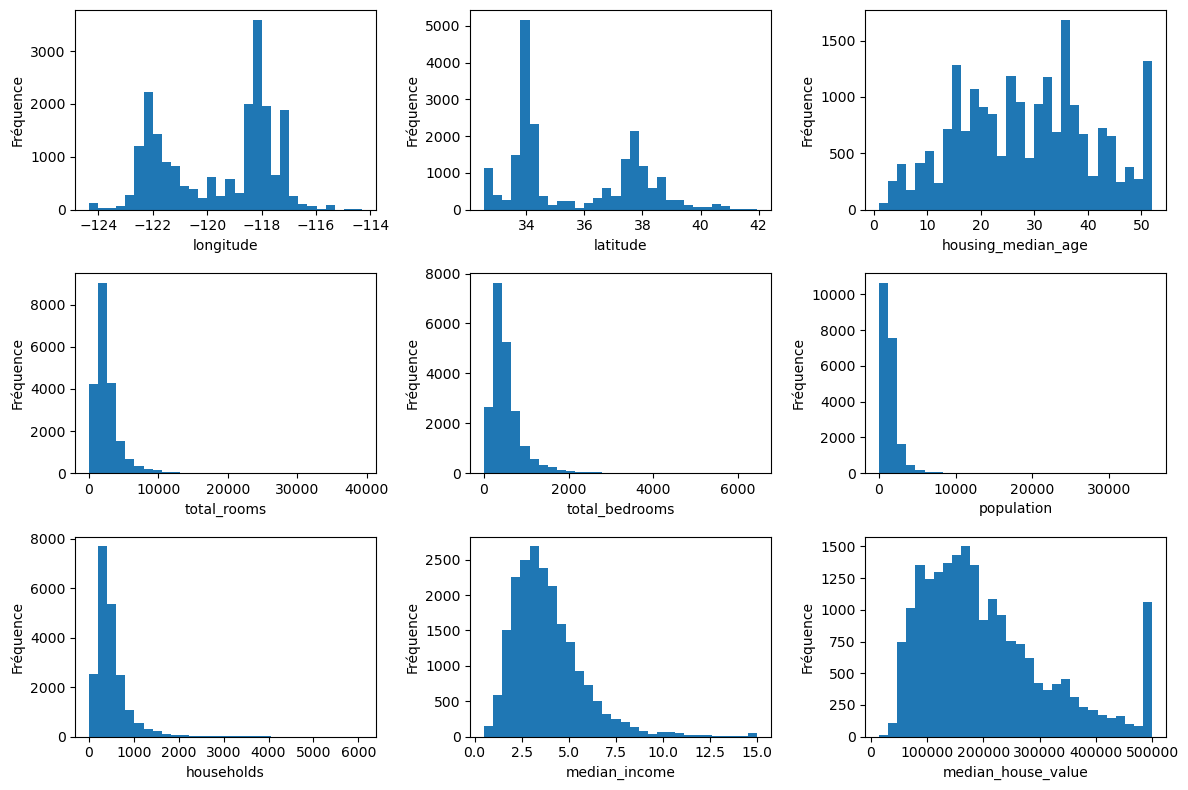

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
# Description univariée des variables numériques

# Sélection des variables quantitatives
quant_vars = data.select_dtypes(include=np.number).columns

# Création des subplots pour chaque variable quantitative sur une même figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(quant_vars):
    axs[i].hist(data[var], bins=30)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()


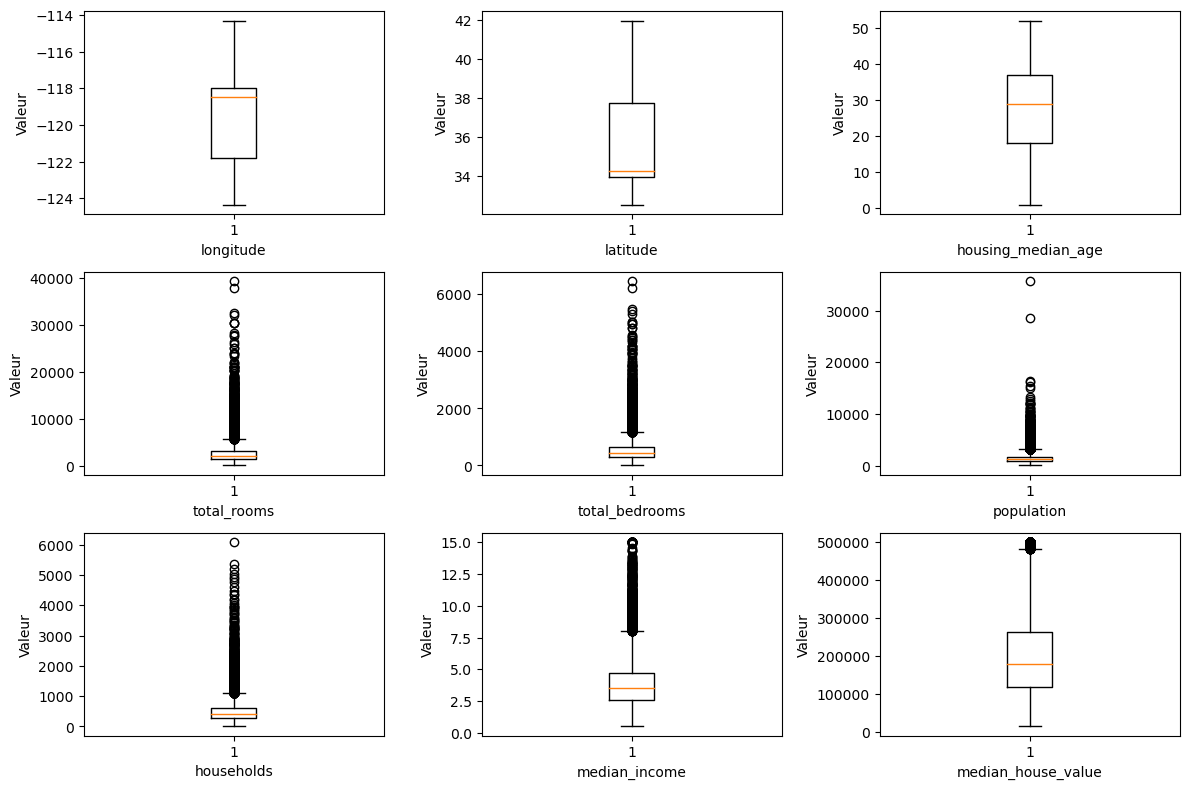

In [9]:
quant_vars = data.select_dtypes(include=np.number).columns
# Création des subplots pour chaque variable quantitative sur une même figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(quant_vars):
    axs[i].boxplot(data[var])
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Valeur')
plt.tight_layout()
plt.show()

## Description de la variable catégorielle 'ocean_proximity'

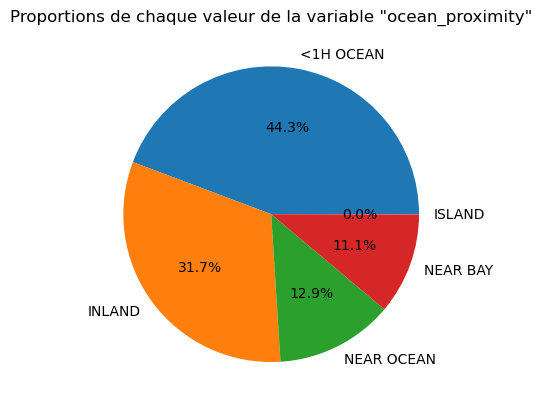

In [10]:


# Calcul des proportions pour chaque valeur de la variable catégorielle
prop_counts = data['ocean_proximity'].value_counts(normalize=True)

# Création du pie chart
plt.pie(prop_counts, labels=prop_counts.index, autopct='%1.1f%%')
plt.title('Proportions de chaque valeur de la variable "ocean_proximity"')
plt.show()

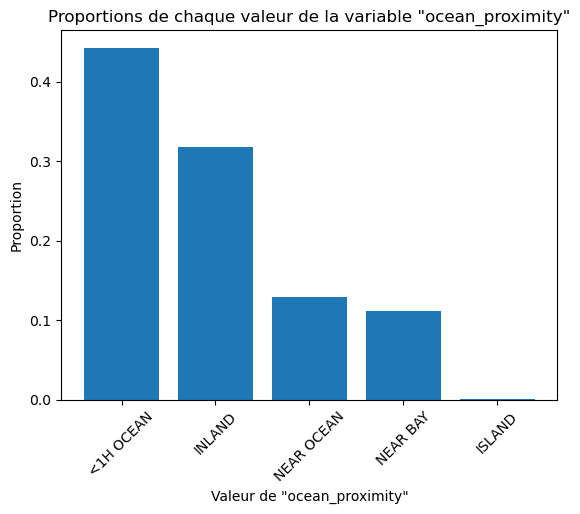

In [11]:

# Calcul des proportions pour chaque valeur de la variable catégorielle
prop_counts = data['ocean_proximity'].value_counts(normalize=True)

# Création du barplot
plt.bar(x=prop_counts.index, height=prop_counts)
plt.xticks(rotation=45)
plt.xlabel('Valeur de "ocean_proximity"')
plt.ylabel('Proportion')
plt.title('Proportions de chaque valeur de la variable "ocean_proximity"')
plt.show()

# Analyses bivariées et sélection des variables pertinentes

## Corrélation entre les variables numériques

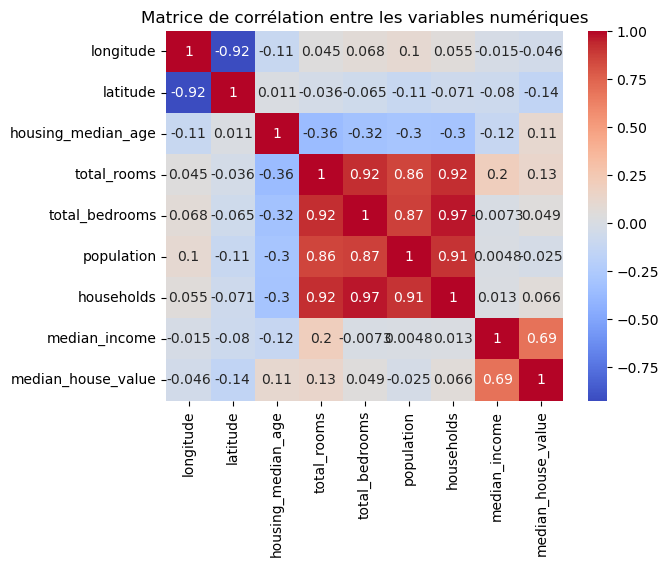

In [12]:
import seaborn as sns
# Corrélation entre les variables numériques
corr_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()


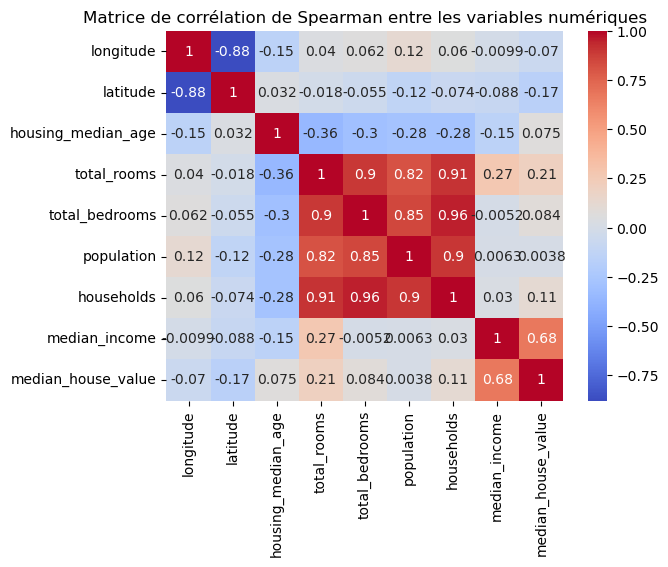

In [13]:
# Sélection des variables numériques
num_vars = data.select_dtypes(include=np.number).columns
# Calcul de la matrice de corrélation de Spearman
corr_matrix = data[num_vars].corr(method='spearman')

# Affichage de la matrice de corrélation de Spearman
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation de Spearman entre les variables numériques')
plt.show()

## Relation entre la variable cible 'median_house_value' et les variables numériques

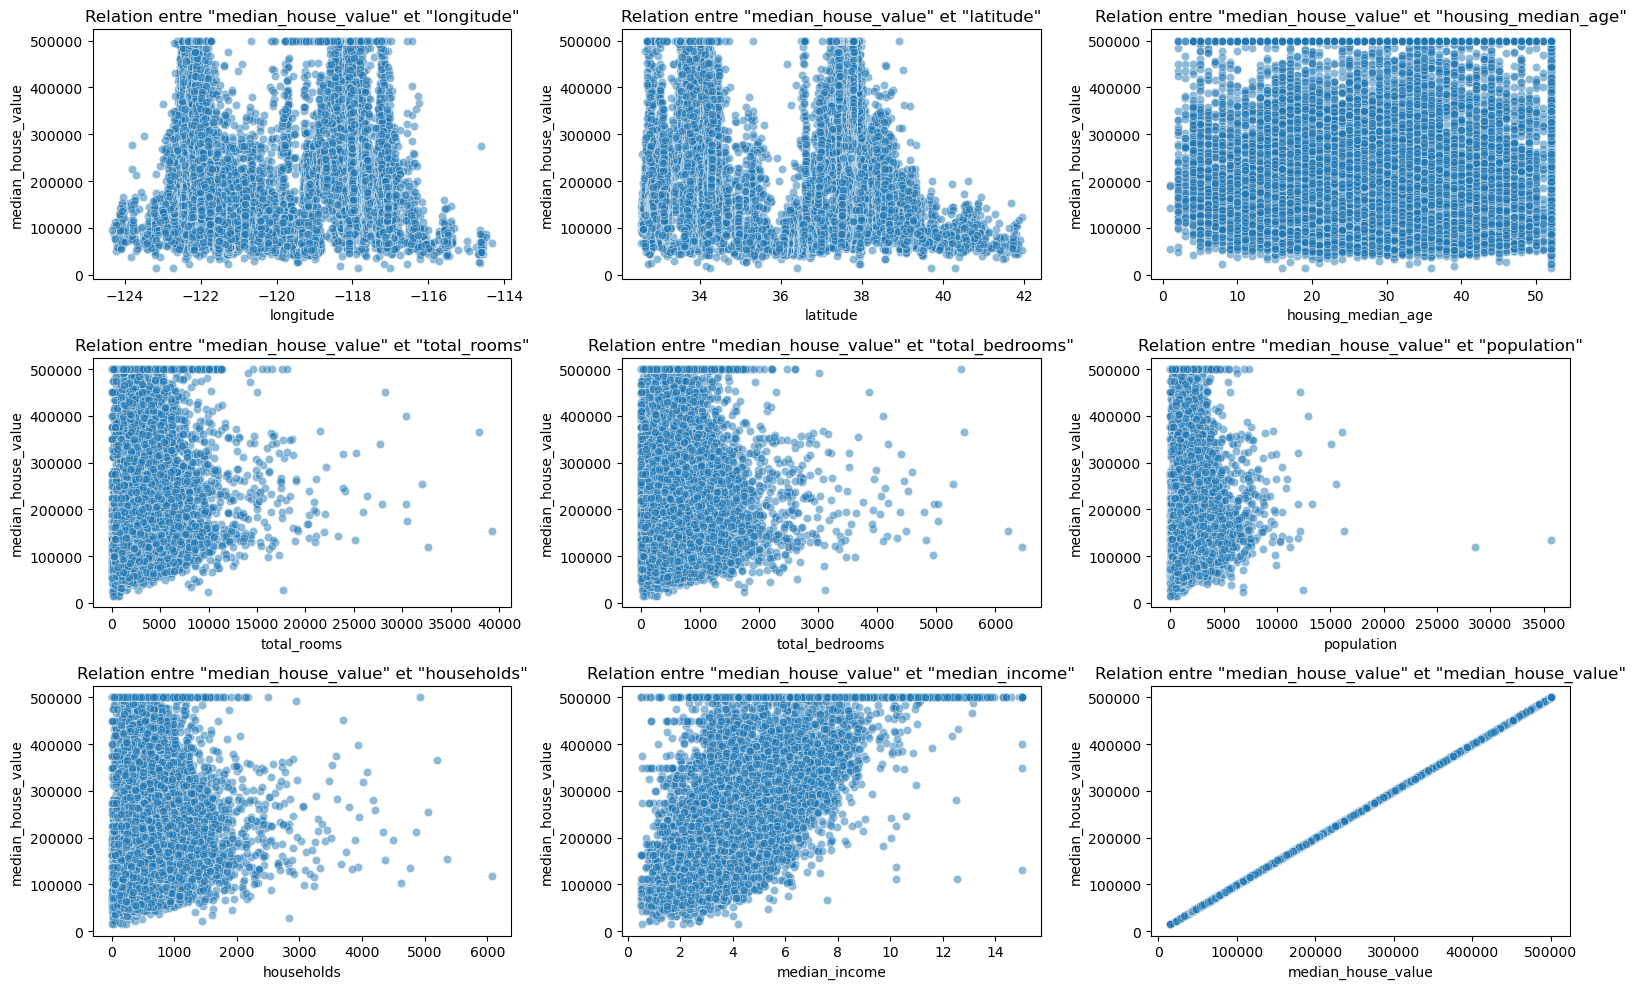

In [14]:
# Sélection des variables numériques
num_vars = data.select_dtypes(include=np.number).columns

# Calcul de la taille de la matrice des subplots en fonction du nombre de variables numériques
n_cols = 3
n_rows = int(np.ceil(len(num_vars) / n_cols))

# Affichage des scatterplots pour chaque variable numérique sur une même figure avec des subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='median_house_value', data=data, alpha=0.5, ax=axs[i])
    axs[i].set_title('Relation entre "median_house_value" et "{}"'.format(var))

# Ajout des titres et des étiquettes des axes
plt.tight_layout()
plt.show()


## Relation entre la variable cible 'median_house_value' et la variable catégorielle 'ocean_proximity'


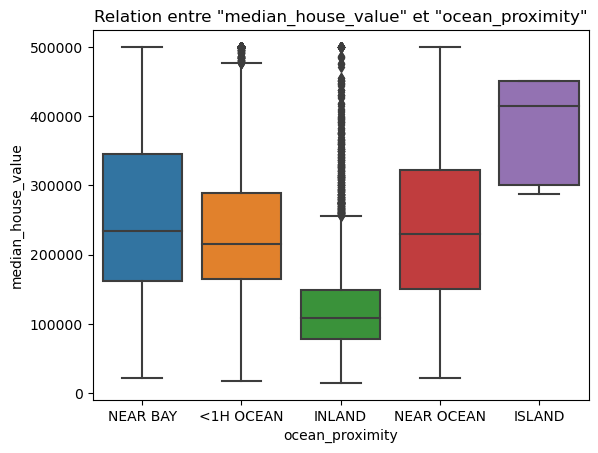

In [15]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Relation entre "median_house_value" et "ocean_proximity"')
plt.show()


## Relation entre les variables numériques

In [ ]:
sns.pairplot(data[num_vars])
plt.show()

# Modélisation du prix du bien immobilier

## Variables

In [17]:
from sklearn.preprocessing import OneHotEncoder
# Sélection des variables catégorielles
cat_vars = ['ocean_proximity']

# Encodage binaire des variables catégorielles
encoder = OneHotEncoder(sparse=False)
cat_data = pd.DataFrame(encoder.fit_transform(data[cat_vars]))
cat_data.columns = encoder.get_feature_names_out(cat_vars)

# Remplacement des variables catégorielles par les variables encodées
data = pd.concat([data.drop(cat_vars, axis=1), cat_data], axis=1)
data


KeyError: "None of [Index(['ocean_proximity'], dtype='object')] are in the [columns]"

In [18]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880,129.0,322,126,8.3252,452600,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099,1106.0,2401,1138,8.3014,358500,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467,190.0,496,177,7.2574,352100,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274,235.0,558,219,5.6431,341300,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627,280.0,565,259,3.8462,342200,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845,330,1.5603,78100,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697,150.0,356,114,2.5568,77100,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254,485.0,1007,433,1.7000,92300,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860,409.0,741,349,1.8672,84700,0.0,1.0,0.0,0.0,0.0


In [19]:
# Séparation des données en variables explicatives et variable cible
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [21]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

## Diviser la base en train en test

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Arbre de régression non optimisé

In [23]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
# Affichage de l'arbre
plt.figure(figsize=(15,10))
plot_tree(tree, feature_names=X_train.columns, filled=True)
plt.show()

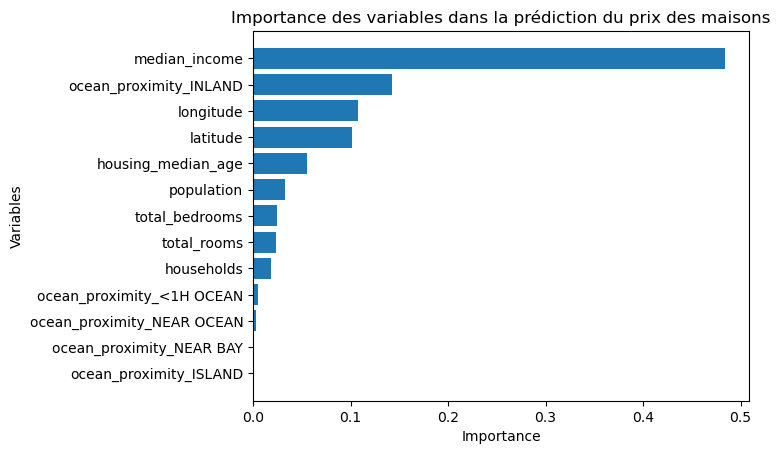

In [24]:
# Affichage de l'importance des variables
importances = pd.Series(tree.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values()
plt.barh(importances_sorted.index, importances_sorted)
plt.title('Importance des variables dans la prédiction du prix des maisons')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()

In [26]:

from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score,r2_score,mean_squared_error


# Prédiction sur la base d'apprentissage et la base de test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Calcul des métriques sur la base d'apprentissage et la base de test
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_medae = median_absolute_error(y_train, y_train_pred)
test_medae = median_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_evs = explained_variance_score(y_train, y_train_pred)
test_evs = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats dans un tableau
results = pd.DataFrame({'Métrique': ['RMSE', 'MAE', 'MedAE', 'R2', 'EVS'], 
                        'Apprentissage': [train_rmse, train_mae, train_medae, train_r2, train_evs], 
                        'Test': [test_rmse, test_mae, test_medae, test_r2, test_evs]})
results.set_index('Métrique', inplace=True)
print(results)

          Apprentissage          Test
Métrique                             
RMSE                0.0  70713.309671
MAE                 0.0  44382.698159
MedAE               0.0  25300.000000
R2                  1.0      0.618411
EVS                 1.0      0.618453


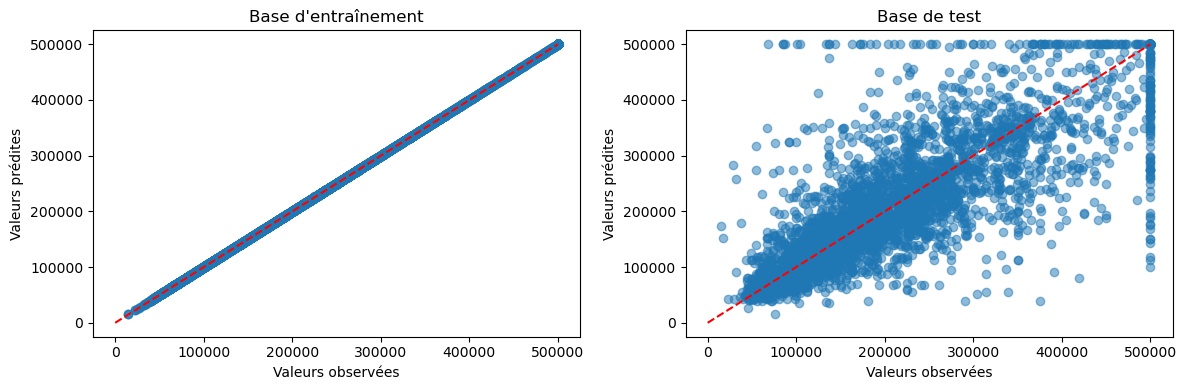

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Graphique pour la base d'entraînement
y_train_pred = tree.predict(X_train)
axs[0].scatter(y_train, y_train_pred, alpha=0.5)
axs[0].plot([0, np.max(y_train)], [0, np.max(y_train)], 'r--')
axs[0].set_xlabel('Valeurs observées')
axs[0].set_ylabel('Valeurs prédites')
axs[0].set_title('Base d\'entraînement')

# Graphique pour la base de test
y_test_pred = tree.predict(X_test)
axs[1].scatter(y_test, y_test_pred, alpha=0.5)
axs[1].plot([0, np.max(y_test)], [0, np.max(y_test)], 'r--')
axs[1].set_xlabel('Valeurs observées')
axs[1].set_ylabel('Valeurs prédites')
axs[1].set_title('Base de test')

# Affichage des graphiques
plt.tight_layout()
plt.show()

## Arbre optimisé avec un élagage (prunning)

Profondeur optimale : 9


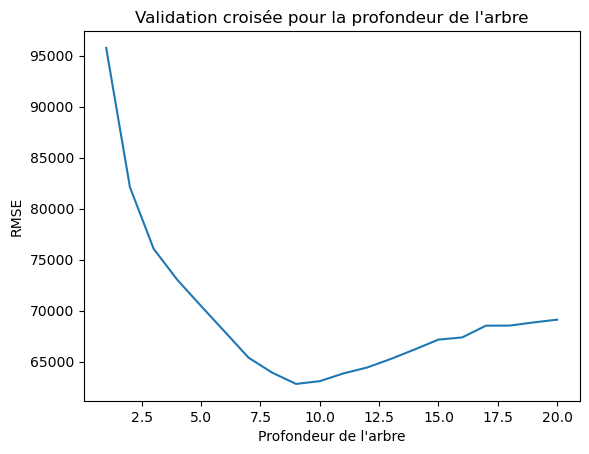

In [28]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille de paramètres
param_grid = {'max_depth': np.arange(1, 21)}

# Instanciation de l'estimateur de l'arbre de décision
tree = DecisionTreeRegressor(random_state=42)

# Instanciation de l'objet GridSearchCV
grid_tree = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Entraînement de l'objet GridSearchCV
grid_tree.fit(X_train, y_train)

# Affichage de la profondeur optimale
print("Profondeur optimale :", grid_tree.best_params_['max_depth'])

# Affichage de la courbe de validation croisée pour la profondeur de l'arbre
plt.plot(param_grid['max_depth'], np.sqrt(-grid_tree.cv_results_['mean_test_score']))
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('RMSE')
plt.title('Validation croisée pour la profondeur de l\'arbre')
plt.show()

In [29]:
# Entrainement d'un nouvel arbre avec la profondeur optimale
tree_optimal = DecisionTreeRegressor(max_depth=grid_tree.best_params_['max_depth'], random_state=42)
tree_optimal.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)

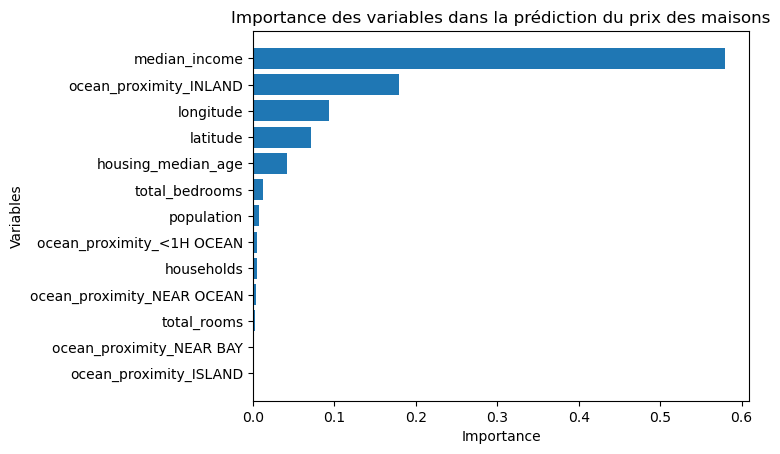

In [30]:
# Affichage de l'importance des variables
importances = pd.Series(tree_optimal.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values()
plt.barh(importances_sorted.index, importances_sorted)
plt.title('Importance des variables dans la prédiction du prix des maisons')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()

In [ ]:
# Afficher l'arbre optimal

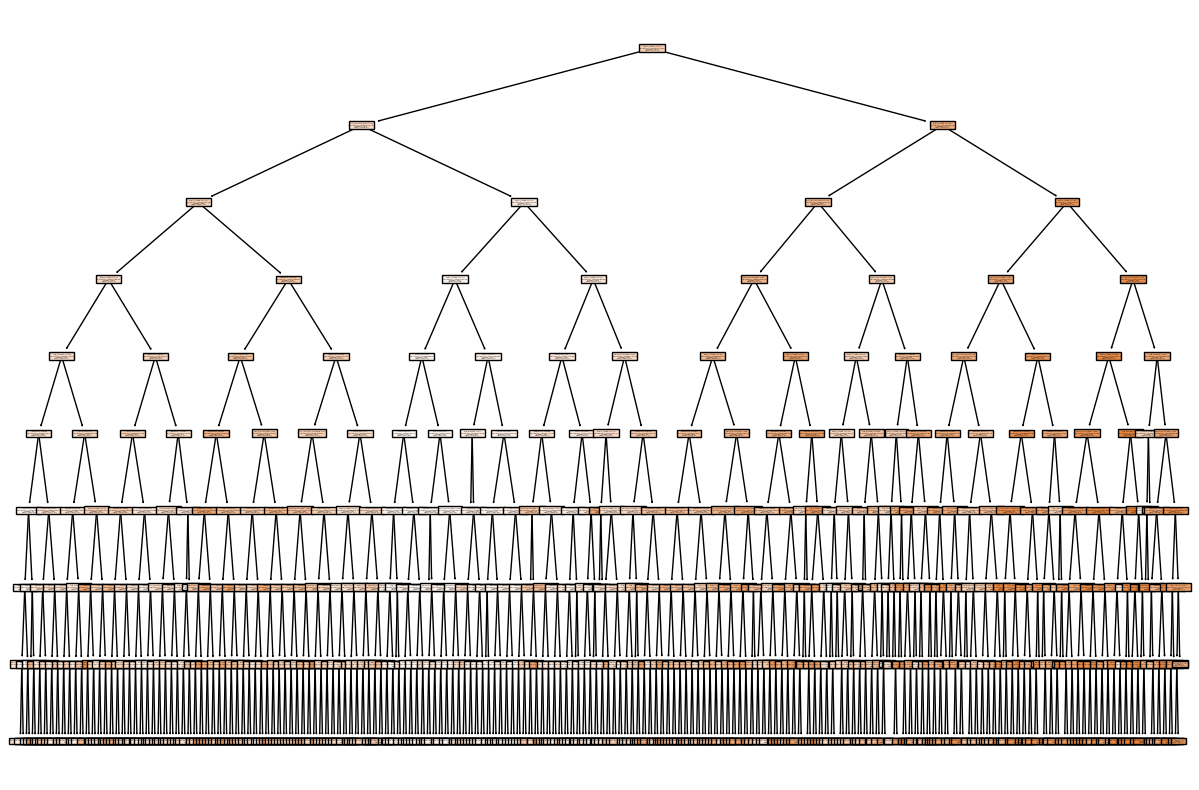

In [31]:
# Affichage de l'arbre
plt.figure(figsize=(15,10))
plot_tree(tree_optimal, feature_names=X_train.columns, filled=True)
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score


# Prédiction sur la base d'apprentissage et la base de test
y_train_pred = tree_optimal.predict(X_train)
y_test_pred = tree_optimal.predict(X_test)

# Calcul des métriques sur la base d'apprentissage et la base de test
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_medae = median_absolute_error(y_train, y_train_pred)
test_medae = median_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_evs = explained_variance_score(y_train, y_train_pred)
test_evs = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats dans un tableau
results = pd.DataFrame({'Métrique': ['RMSE', 'MAE', 'MedAE', 'R2', 'EVS'], 
                        'Apprentissage': [train_rmse, train_mae, train_medae, train_r2, train_evs], 
                        'Test': [test_rmse, test_mae, test_medae, test_r2, test_evs]})
results.set_index('Métrique', inplace=True)
print(results)

          Apprentissage          Test
Métrique                             
RMSE       52623.909413  64193.768674
MAE        36242.280327  41999.068763
MedAE      25005.760624  27808.855498
R2             0.792840      0.685530
EVS            0.792840      0.685584


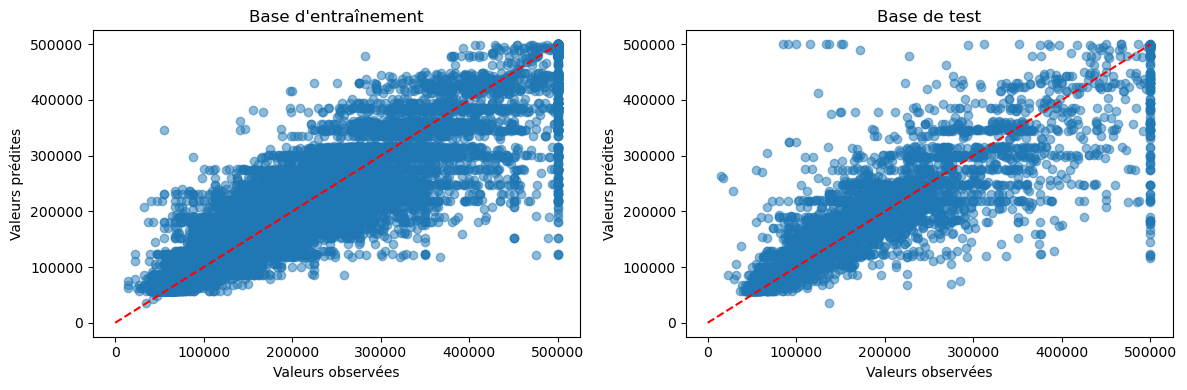

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Graphique pour la base d'entraînement
y_train_pred = tree_optimal.predict(X_train)
axs[0].scatter(y_train, y_train_pred, alpha=0.5)
axs[0].plot([0, np.max(y_train)], [0, np.max(y_train)], 'r--')
axs[0].set_xlabel('Valeurs observées')
axs[0].set_ylabel('Valeurs prédites')
axs[0].set_title('Base d\'entraînement')

# Graphique pour la base de test
y_test_pred = tree_optimal.predict(X_test)
axs[1].scatter(y_test, y_test_pred, alpha=0.5)
axs[1].plot([0, np.max(y_test)], [0, np.max(y_test)], 'r--')
axs[1].set_xlabel('Valeurs observées')
axs[1].set_ylabel('Valeurs prédites')
axs[1].set_title('Base de test')

# Affichage des graphiques
plt.tight_layout()
plt.show()

## Tester une autre coupure de l'arbre

In [34]:
# Entrainement d'un nouvel arbre avec la profondeur optimale
tree_other = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_other.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

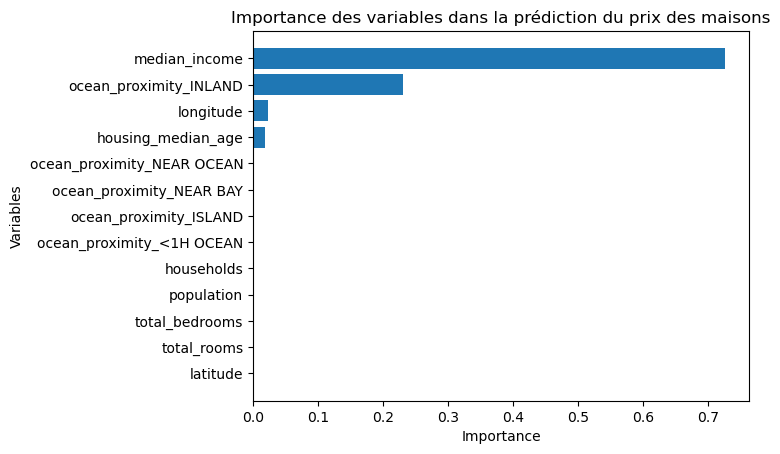

In [35]:
# Affichage de l'importance des variables
importances = pd.Series(tree_other.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values()
plt.barh(importances_sorted.index, importances_sorted)
plt.title('Importance des variables dans la prédiction du prix des maisons')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()

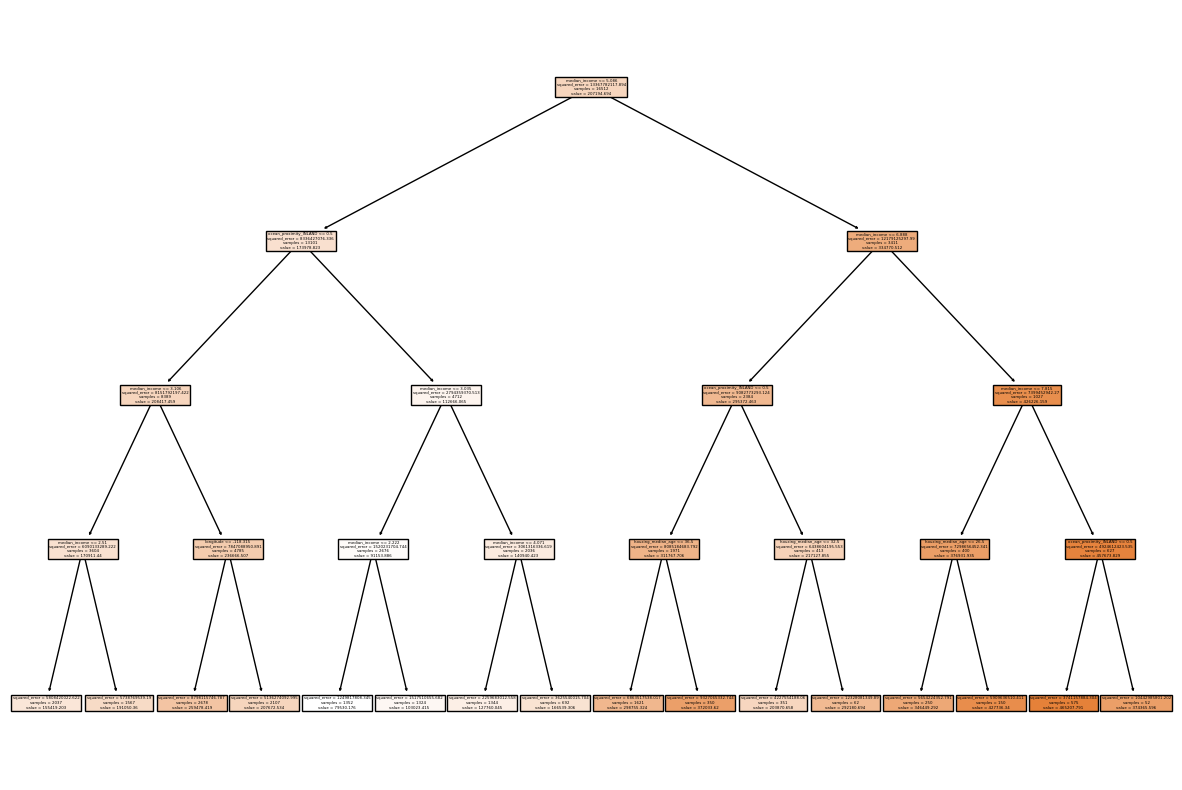

In [36]:
# Affichage de l'arbre
plt.figure(figsize=(15,10))
plot_tree(tree_other, feature_names=X_train.columns, filled=True)
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score


# Prédiction sur la base d'apprentissage et la base de test
y_train_pred = tree_other.predict(X_train)
y_test_pred = tree_other.predict(X_test)

# Calcul des métriques sur la base d'apprentissage et la base de test
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_medae = median_absolute_error(y_train, y_train_pred)
test_medae = median_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_evs = explained_variance_score(y_train, y_train_pred)
test_evs = explained_variance_score(y_test, y_test_pred)

# Affichage des résultats dans un tableau
results = pd.DataFrame({'Métrique': ['RMSE', 'MAE', 'MedAE', 'R2', 'EVS'], 
                        'Apprentissage': [train_rmse, train_mae, train_medae, train_r2, train_evs], 
                        'Test': [test_rmse, test_mae, test_medae, test_r2, test_evs]})
results.set_index('Métrique', inplace=True)
print(results)

          Apprentissage          Test
Métrique                             
RMSE       72204.591609  73811.562991
MAE        51994.909367  52474.097859
MedAE      36619.202749  36011.087006
R2             0.609995      0.584241
EVS            0.609995      0.584272


# QUIZZ



1. Quel est l'objectif principal de l'optimisation de l'arbre de régression ?
   - a) Trouver la profondeur maximale de l'arbre
   - b) Trouver les critères optimaux pour la sélection des attributs
   - c) Minimiser l'erreur quadratique moyenne
   - d) Maximiser l'expliquabilité de l'arbre

2. Comment peut-on éviter le surajustement de l'arbre de régression ?
   - a) En augmentant la profondeur maximale de l'arbre
   - b) En réduisant la profondeur maximale de l'arbre
   - c) En choisissant un critère de sélection d'attributs qui favorise la complexité de l'arbre
   - d) En augmentant la taille du jeu de données d'entraînement

3. Quel est le critère de sélection d'attributs le plus communément utilisé pour l'arbre de régression en Python ?
   - a) mse
   - b) gini
   - c) entropy
   - d) friedman_mse

4. Comment peut-on trouver la profondeur maximale optimale de l'arbre de régression en Python ?
   - a) En utilisant la validation croisée
   - b) En utilisant la méthode RFE (Recursive Feature Elimination)
   - c) En utilisant le critère de Bayes
   - d) En choisissant la profondeur maximale manuellement

